# **Classification Project - Hotel Booking Cancellation Prediction**


Welcome to the project on classification. We will use the **INN Hotels dataset** for this project.

--------------------------------
## **Context** 
-------------------------------

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include changes of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings potentially impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices at last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

----------------------------
## **Objective**
----------------------------- 

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting **which booking is likely to be canceled**. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a data scientist, have to analyze the data provided to find which **factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.**


--------------------------
## **Data Description**
--------------------------

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: The unique identifier of each booking

* no_of_adults: The number of adults

* no_of_children: The number of children

* no_of_weekend_nights: The number of weekend nights (Saturday and Sunday) the guest stayed or booked to stay at the hotel

* no_of_week_nights: The number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

* type_of_meal_plan: The type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)

* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

* room_type_reserved: The type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

* lead_time: The number of days between the date of booking and the arrival date

* arrival_year: The year of arrival date

* arrival_month: The month of arrival date

* arrival_date: The date of the month

* market_segment_type: Market segment designation.

* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

* no_of_previous_cancellations: The number of previous bookings that were canceled by the customer before the current booking

* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the customer before the current booking

* avg_price_per_room: The average price per day for the reservation; prices of the rooms are dynamic. (in euros)

* no_of_special_requests: The total number of special requests made by the customer (e.g. high floor, view from the room, etc.)

* booking_status: Flag indicating if the booking was canceled or not. The class 0 represents the Not_Canceled whereas class 1 represents the Canceled label.

## **Importing the necessary libraries and overview of the dataset**

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Libraries for data manipulation and visualization
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report,f1_score

from sklearn import metrics

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

### **Loading the data**

In [4]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [5]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

### **View the first and the last 5 rows of the dataset**

In [5]:
# View head of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# View tail of the data
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Checking the info of the data**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset has **36,275 rows and 19 columns**. 

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of **object type** while the rest of the columns are numeric in nature.

* There are **no null values** in the dataset.

* **Booking_ID column is an identifier**. Let's check if each entry of the column is unique.

In [8]:
data.Booking_ID.nunique()

36275

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

### **Dropping the Booking_ID column**

In [6]:
data = data.drop('Booking_ID',axis=1)

In [7]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics for numerical columns**

In [15]:
# Selecting numerical columns and checking the summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations:__There were some rooms that were booked for 0 dollars, so there was likely a promotion.  The median price for a room is 99.45.  One guest canceled 13 times, and one guest did not cancel 58 times.___**

In [16]:
# Checking the rows where the avg_price_per_room is 0
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [17]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

**Observations:**

* It makes sense that most values with room prices equal to 0 are the rooms given as a complimentary service by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

### **Checking the distribution and outliers for numerical columns in the data**

lead_time
Skew : 1.29


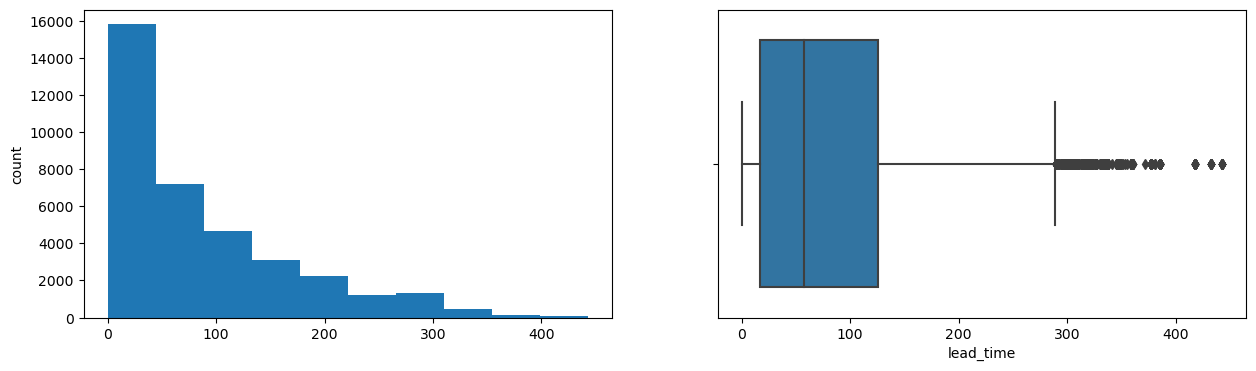

no_of_previous_cancellations
Skew : 25.2


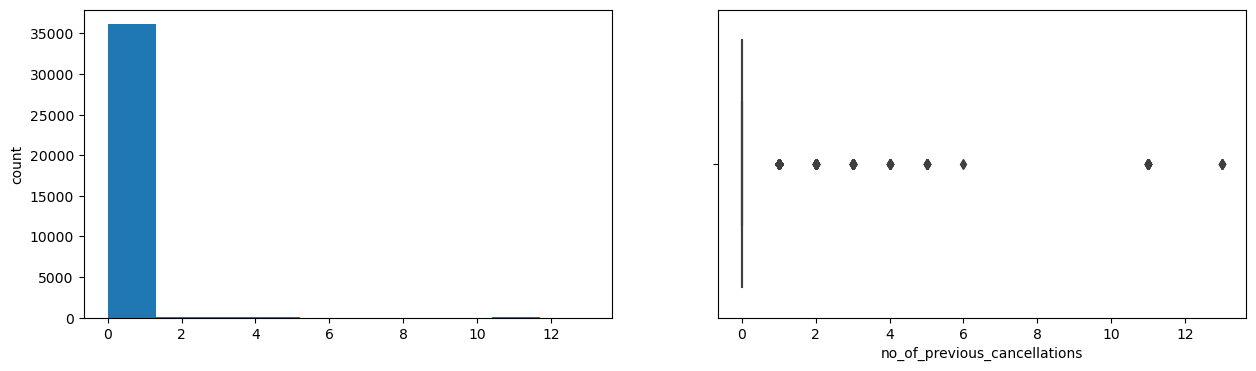

no_of_previous_bookings_not_canceled
Skew : 19.25


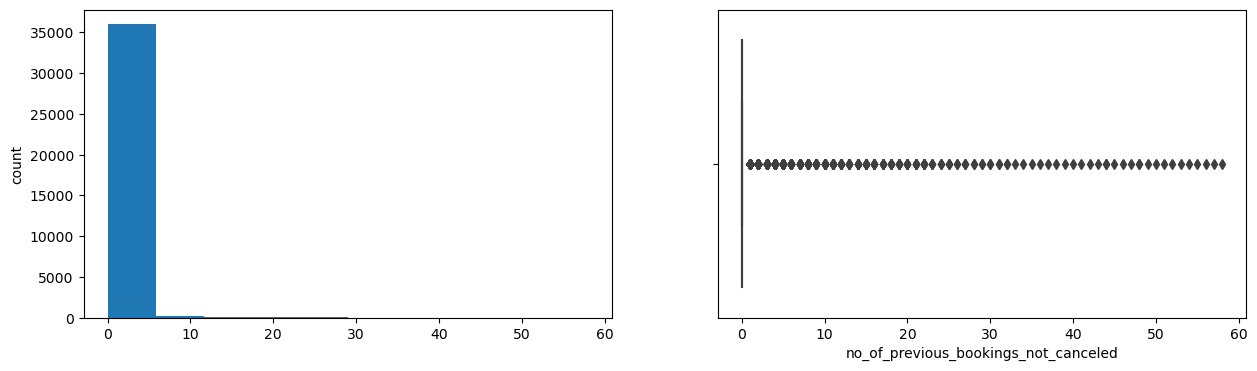

avg_price_per_room
Skew : 0.67


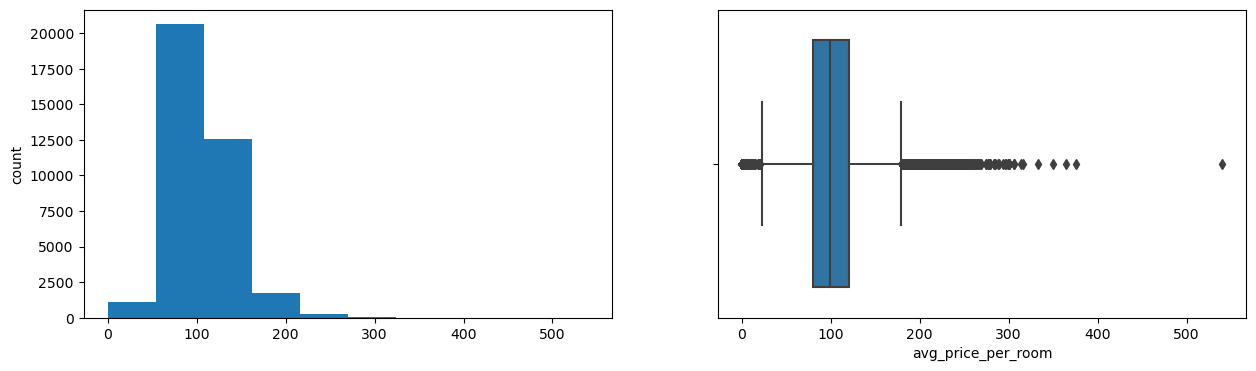

In [8]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col)
    
    print('Skew :', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1,2,1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:_The distributions for the number of previous booking canceled, not-canceled, lead time, and room price are skewed to the right with some outliers. The outliers will be left in place for the analysis because they appear legitimate._**

In [9]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [18]:
# Assigning the value of upper whisker to outliers
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Now, let's check the percentage of each category for categorical variables.**

In [41]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space', 
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests', 
        'booking_status']

for col in cat_cols:
    print((data[col].value_counts(normalize = True).to_frame()*100), '\n')
    

   no_of_adults
2     71.972433
1     21.212957
3      6.387319
0      0.383184
4      0.044108 

   no_of_children
0       92.562371
1        4.460372
2        2.916609
3        0.060648 

    no_of_week_nights
2           31.547898
1           26.155755
3           21.609924
4            8.242591
0            6.580289
5            4.449345
6            0.521020
7            0.311509
10           0.170917
8            0.170917
9            0.093728
11           0.046864
15           0.027567
12           0.024810
14           0.019297
13           0.013784
17           0.008270
16           0.005513 

   no_of_weekend_nights
0             46.511371
1             27.553411
2             25.006203
3              0.421778
4              0.355617
5              0.093728
6              0.055134
7              0.002757 

   required_car_parking_space
0                   96.901447
1                    3.098553 

              type_of_meal_plan
Meal Plan 1           76.733287
Not Selected    

**Observations:__The majority of bookings are 2 adults or less with no children.  Most do not need a parking space.  Only 14% do not get a meal plan. 63% of bookings are online. 33% of bookings are cancelled.______**

### **Replacing values 9 and 10 for the number of children with 3 and encoding the target variable**

In [22]:
# Replacing values 9 and 10 with 3 for the column no_of_children
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

In [23]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of market segment type with the average price per room.

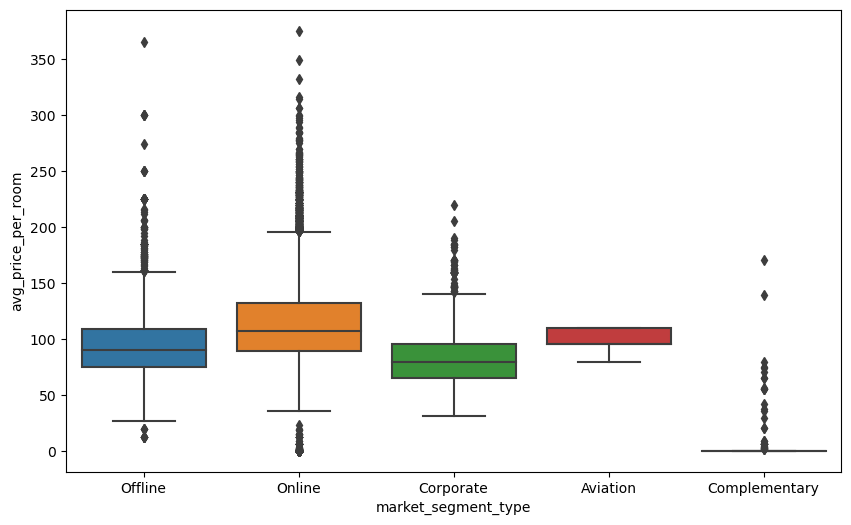

In [24]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "market_segment_type", y = "avg_price_per_room")

plt.show()

**Observations:**

* **Rooms booked online have the highest variations in prices.**
* The distribution for offline and corporate room prices are almost similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status.**

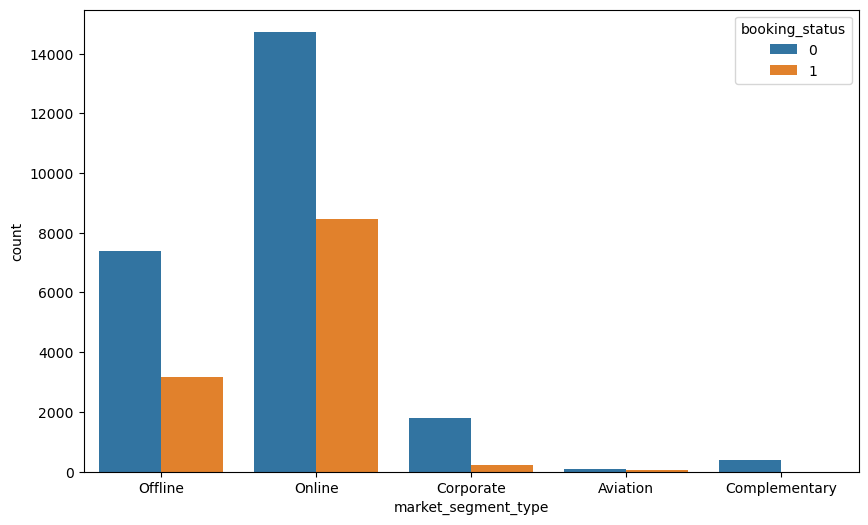

In [25]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'market_segment_type', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* **Online bookings have the highest number of cancellations.**
* Bookings made offline are less prone to cancellations.
* Corporate and complementary segment also show very low number of cancellations.

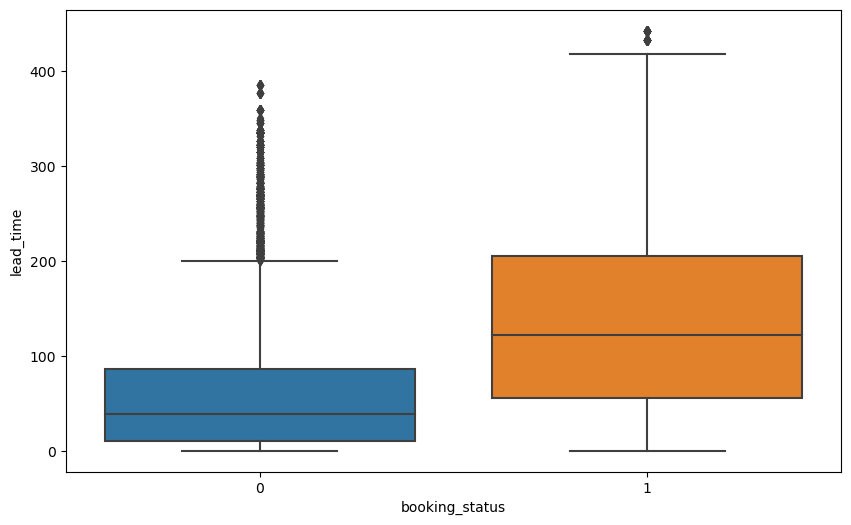

In [26]:
plt.figure(figsize = (10, 6))

sns.boxplot(data = data, x = "booking_status", y = "lead_time")

plt.show()

**Observations:**

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled. 
- **The higher the lead time, the higher are the chances of a booking being canceled.**

**Now, let's check how the arrival month impacts the booking status.**

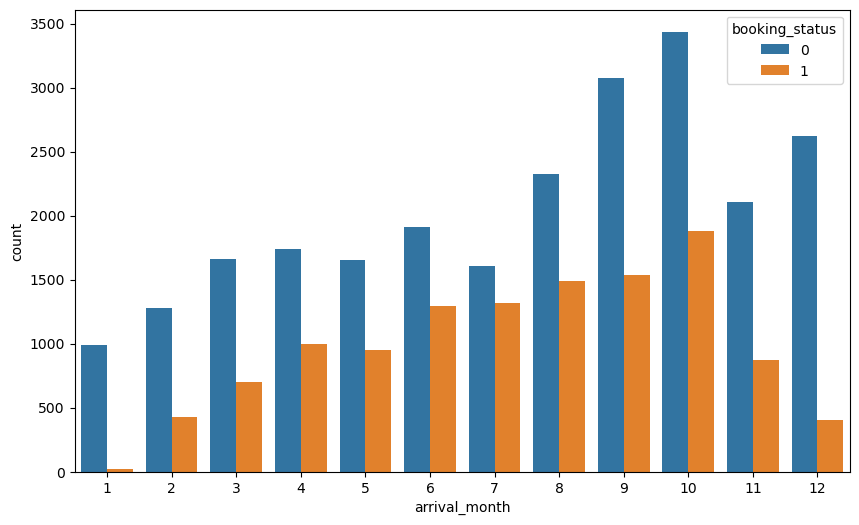

In [27]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'arrival_month', hue = 'booking_status', data = data)

plt.show()

**Observations:**

- We observed earlier that the month of October has the highest number of bookings but the above plot shows that **October has the highest number of cancellations** as well.
- Bookings made for **December and January are least prone to cancellations**.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

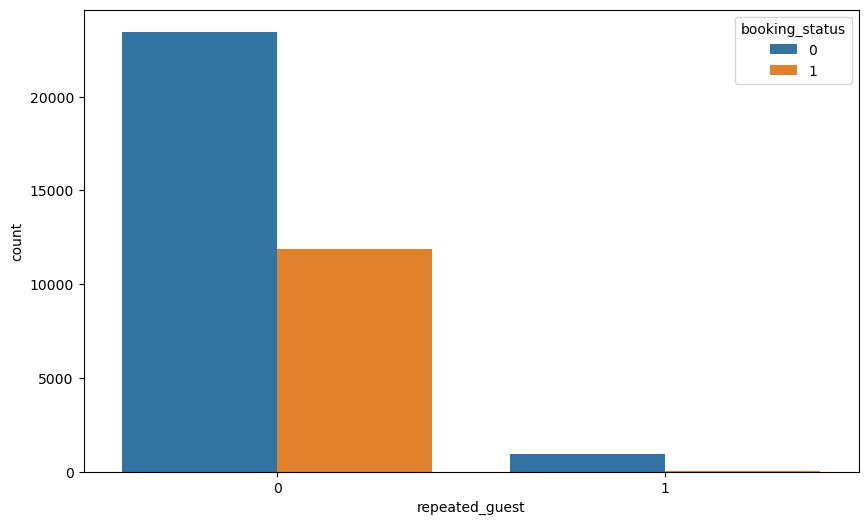

In [28]:
plt.figure(figsize = (10, 6))

sns.countplot(x = 'repeated_guest', hue = 'booking_status', data = data)

plt.show()

**Observations:**

* There are **very few repeat customers but the cancellation among them is very less**. 
* This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

<Axes: >

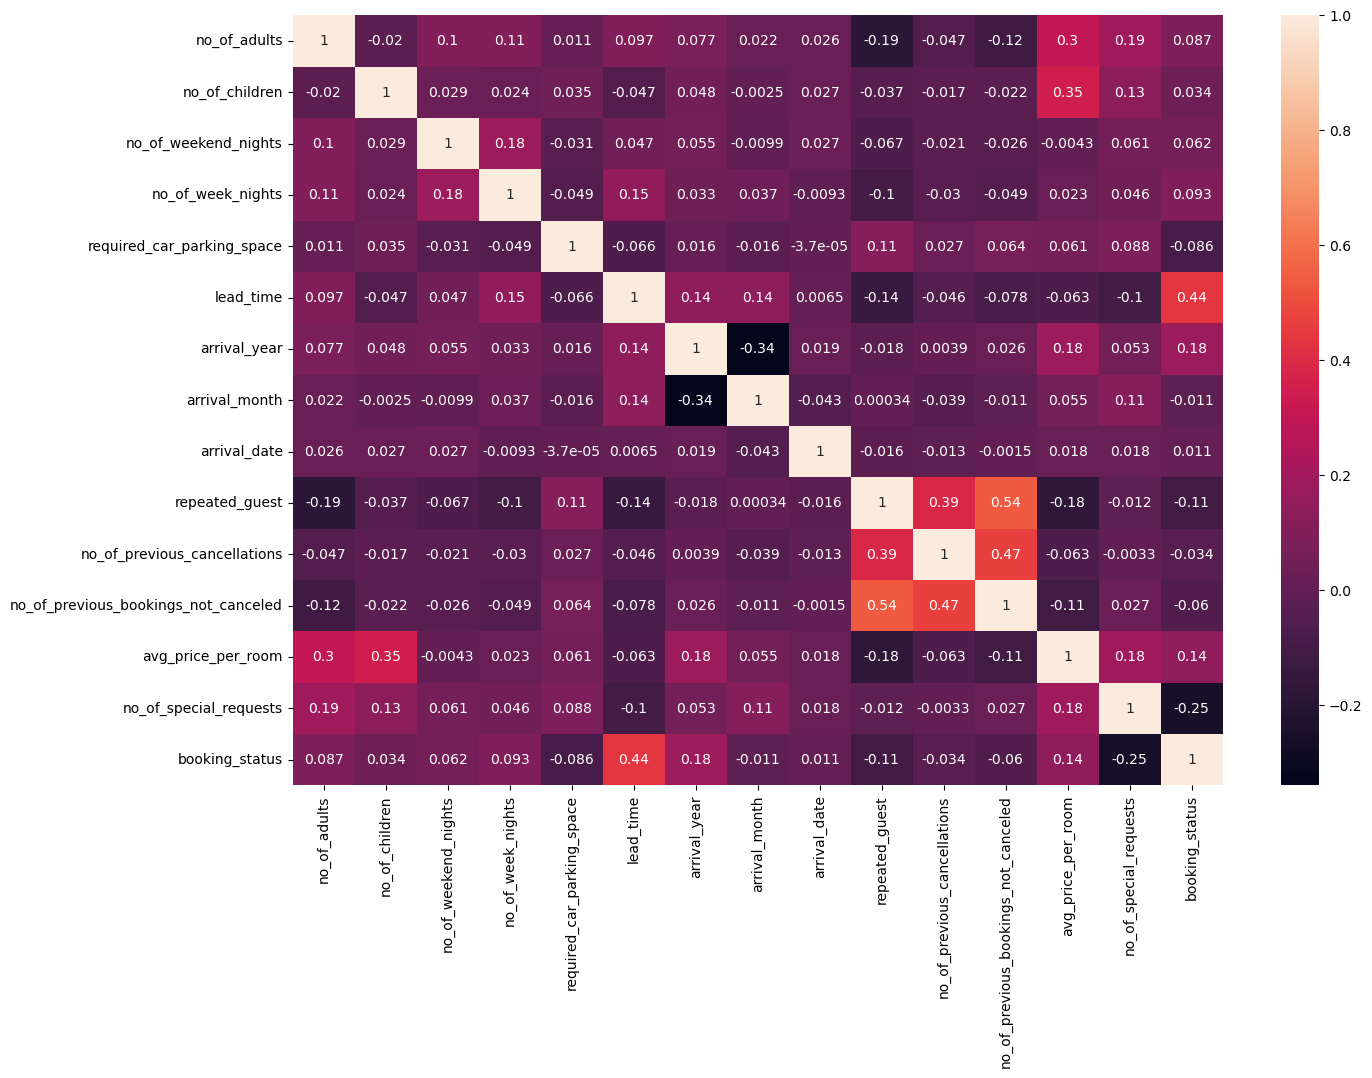

In [36]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), annot=True)

**Observations:_The greatest corrlation is # of bookings not canceled and repeated guest.  There is also slight correlation between # of cancelations and # of bookings not cancelled, and between lead time and booking status._**


**Now that we have explored our data, let's prepare it for modeling.**

## **Preparing the data for modeling**

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

In [71]:
X = data.drop('booking_status', axis=1)
Y = data['booking_status']

In [73]:
# Creating dummy variables, drop_first = True is used to avoid redundant variables
cols=X.select_dtypes(object).columns
X = pd.get_dummies(data = X, columns = cols, drop_first = True)

In [74]:
X.T

,0,1,2,3,4,5,6,7,8,9,...,36265,36266,36267,36268,36269,36270,36271,36272,36273,36274
no_of_adults,2.0,2.00,1.0,2.0,2.0,2.0,2.00,2.00,3.0,2.00,...,2.00,2.00,2.00,1.0,2.0,3.0,2.00,2.00,2.0,2.00
no_of_children,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.0,2.0,0.0,0.00,0.00,0.0,0.00
no_of_weekend_nights,1.0,2.00,2.0,0.0,1.0,0.0,1.00,1.00,0.0,0.00,...,1.00,2.00,1.00,0.0,0.0,2.0,1.00,2.00,0.0,1.00
no_of_week_nights,2.0,3.00,1.0,2.0,1.0,2.0,3.00,3.00,4.0,5.00,...,3.00,2.00,0.00,3.0,1.0,6.0,3.00,6.00,3.0,2.00
required_car_parking_space,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00
lead_time,224.0,5.00,1.0,211.0,48.0,346.0,34.00,83.00,121.0,44.00,...,15.00,8.00,49.00,166.0,0.0,85.0,228.00,148.00,63.0,207.00
arrival_year,2017.0,2018.00,2018.0,2018.0,2018.0,2018.0,2017.00,2018.00,2018.0,2018.00,...,2018.00,2018.00,2018.00,2018.0,2018.0,2018.0,2018.00,2018.00,2018.0,2018.00
arrival_month,10.0,11.00,2.0,5.0,4.0,9.0,10.00,12.00,7.0,10.00,...,5.00,3.00,7.00,11.0,10.0,8.0,10.00,7.00,4.0,12.00
arrival_date,2.0,6.00,28.0,20.0,11.0,13.0,15.00,26.00,6.0,18.00,...,30.00,4.00,11.00,1.0,6.0,3.0,17.00,1.00,21.0,30.00
repeated_guest,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,...,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00


In [75]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

## **Building Classification Models**

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer cancels their booking.
2. Predicting a customer will cancel their booking but in reality, the customer does not cancel their booking. 

**Which case is more important?** 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled, then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled, then the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.


**How to reduce the losses?**

* Hotel would want `F1 Score` to be maximized, greater the F1 score, higher are the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [76]:
# Function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Canceled', 'Canceled'], yticklabels = ['Not Canceled', 'Canceled'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

### **Decision Tree**

In [77]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state = 1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



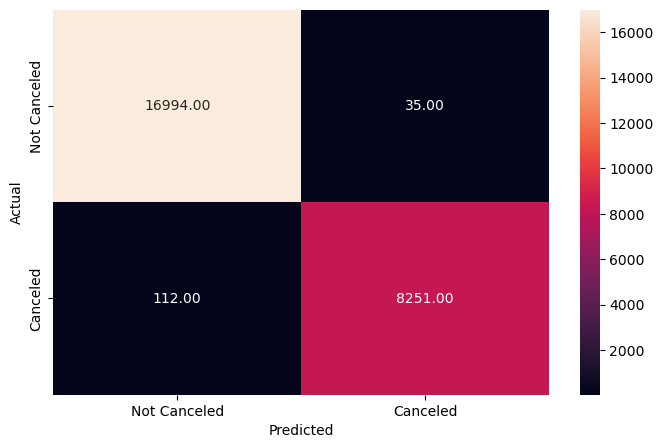

In [78]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking.
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking.
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking.
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking.

**Observations:_There were 112 false positives with this model.  It would be best to minimize false positives or surprise cancellations to prevent loss in revenue.  The model did well not overpredicting cancellations.________**


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7361
           1       0.79      0.81      0.80      3522

    accuracy                           0.87     10883
   macro avg       0.85      0.86      0.85     10883
weighted avg       0.87      0.87      0.87     10883



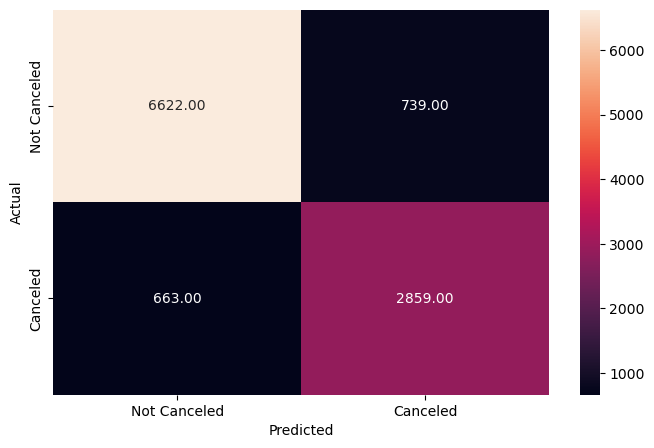

In [79]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

metrics_score(y_test,y_pred_test1)

**Observations:__The model had lower precision on predicting cancellations with the test data, there were 663 surprise cancellations.  The overall precision for cancellations is 79%.  The model could be further optimized._______**

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is **approximately** the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [80]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=9,
                       min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     17029
           1       0.74      0.87      0.80      8363

    accuracy                           0.86     25392
   macro avg       0.84      0.86      0.85     25392
weighted avg       0.87      0.86      0.86     25392



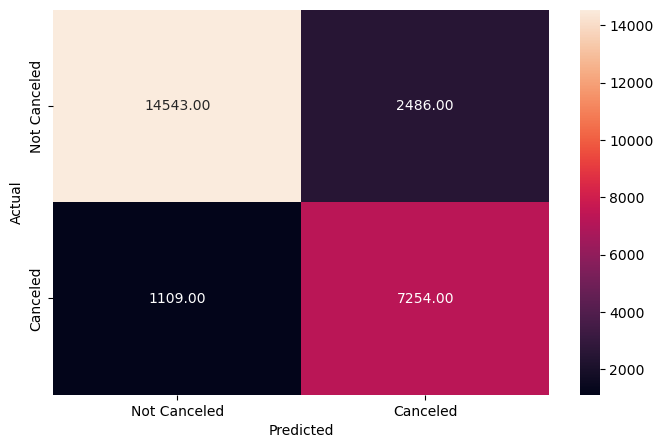

In [81]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

**Observations:__Scores went down on the training data so the model should not be overfitting.  The model is still low on precision for cancellations. Let see if there was good generalization on the testing data.________**

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7361
           1       0.72      0.84      0.78      3522

    accuracy                           0.84     10883
   macro avg       0.82      0.84      0.83     10883
weighted avg       0.85      0.84      0.85     10883



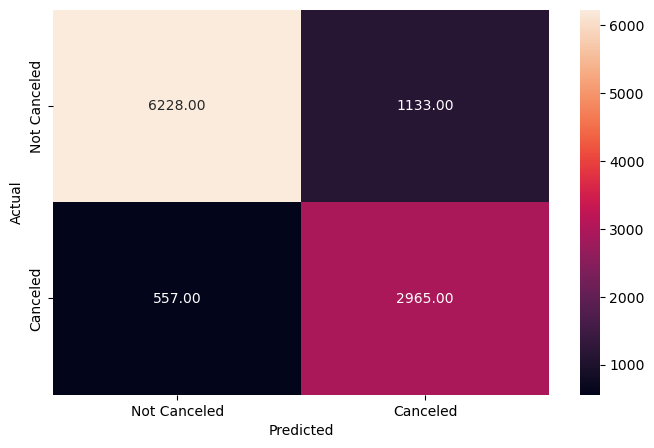

In [91]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test,y_pred_test2)

**Observations:__The recall of the model has improved on the testing data.  The model is missing less cancellations, however that came at the price of slight overprediction of cancellation.  This may be acceptable though if it is more important to prevent cancellations by the hotel sending reminders or promotions.________**

**Let's visualize the tuned decision tree** and observe the decision rules:

**It is hard to visualize and interpret the tree with depth = 9, We can reduce the depth to 3 and visualize it**

In [83]:
tree_model = DecisionTreeClassifier(class_weight = {0: 0.3, 1: 0.7}, max_depth = 3,
                       min_samples_leaf = 5, random_state = 7)

# Fit the best algorithm to the data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=7)

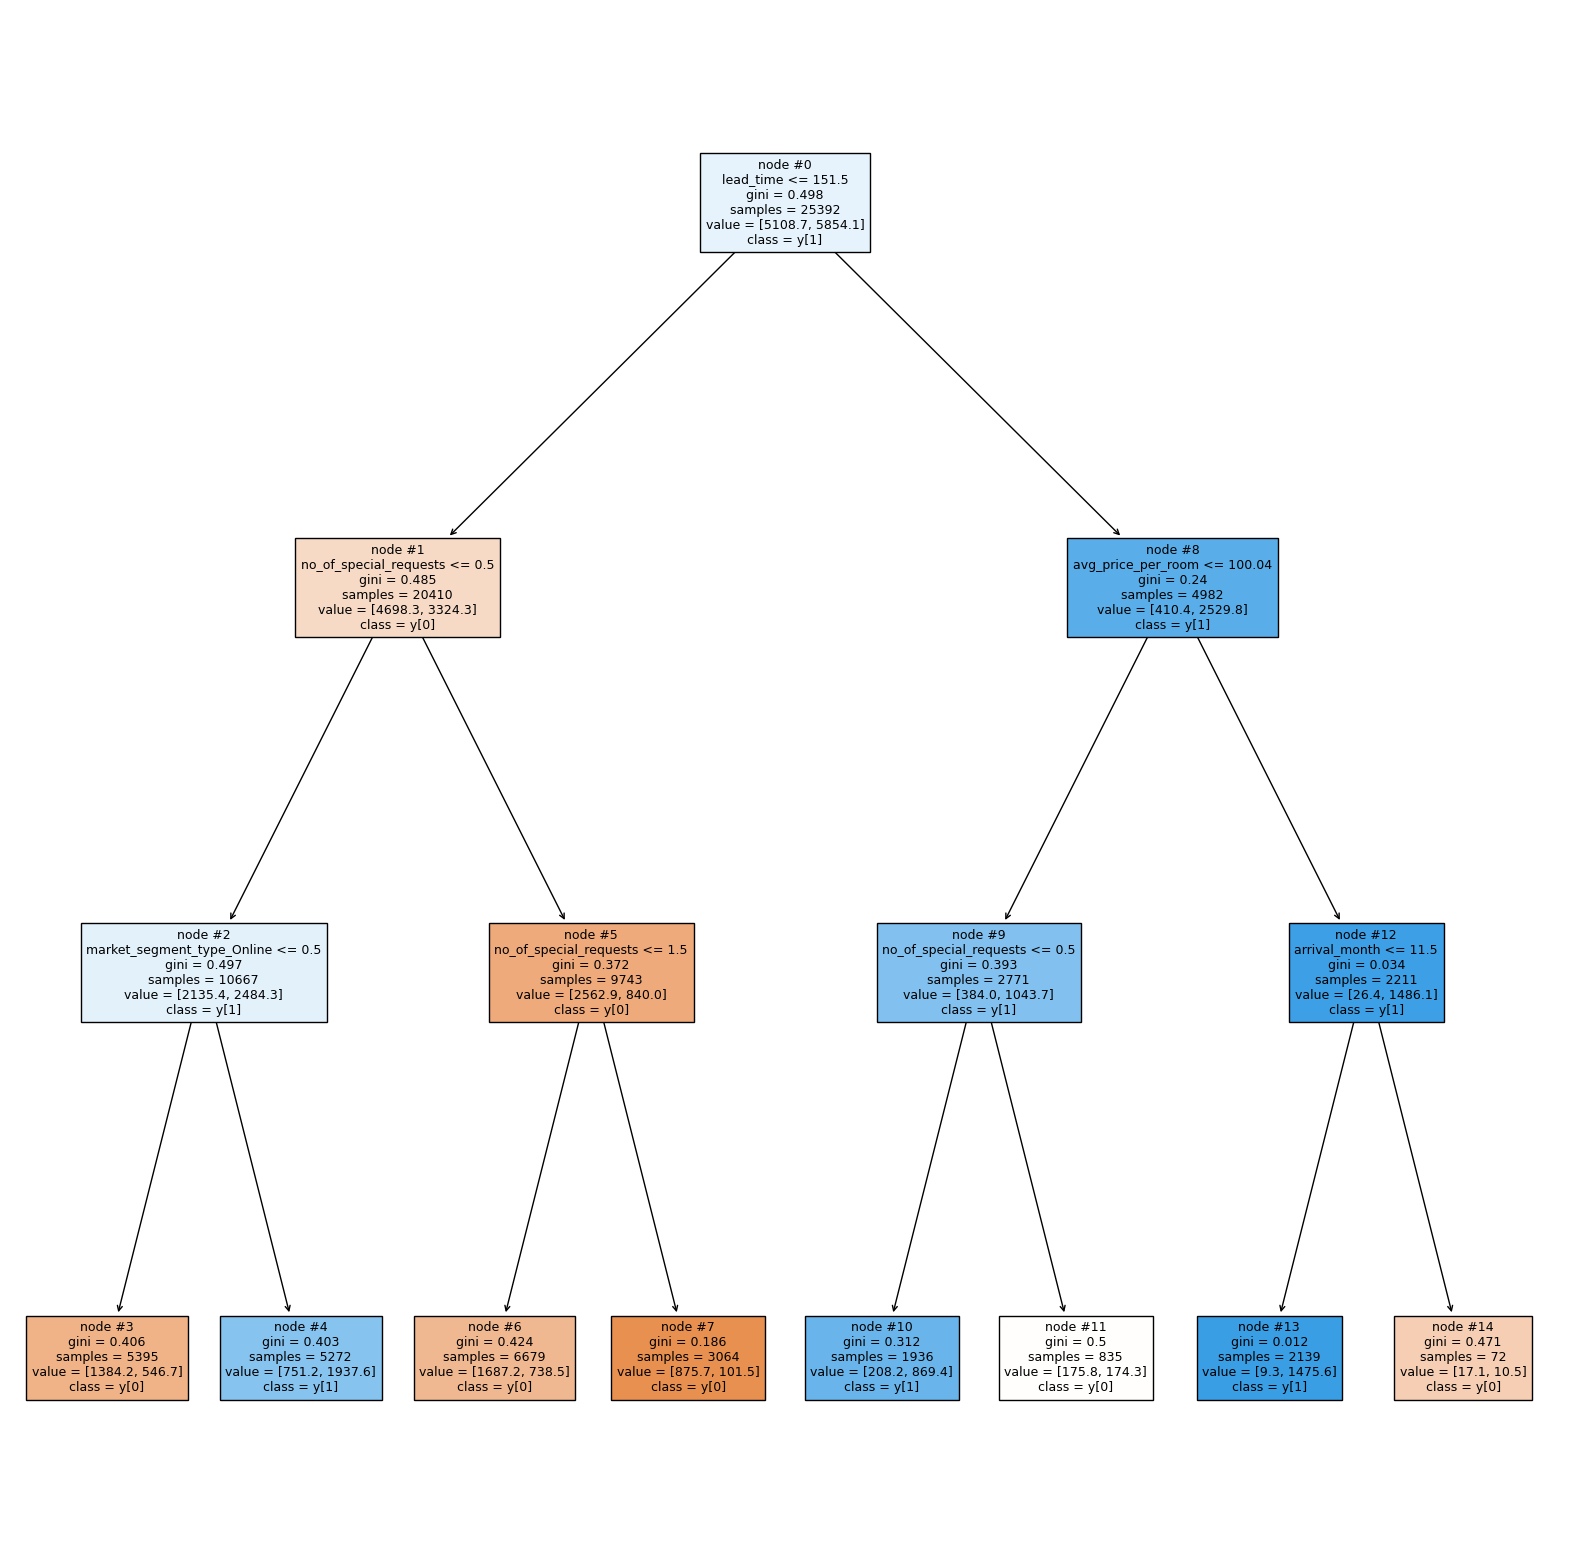

In [84]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(tree_model, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Observations:_Lead time is the root node for the decision tree which makes sense.  Bookings around the holidays at the end of the yaer are unlikely to cancel.  Room price and whether the booking was made online are also an important factors for cancellation.____**

**Let's look at the feature importance** of the tuned decision tree model

In [85]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                               Imp
lead_time                             4.098536e-01
market_segment_type_Online            1.580689e-01
no_of_special_requests                1.454057e-01
avg_price_per_room                    1.024682e-01
arrival_month                         4.743526e-02
no_of_adults                          2.340166e-02
no_of_weekend_nights                  2.309086e-02
arrival_date                          2.097479e-02
arrival_year                          2.029044e-02
no_of_week_nights                     1.882969e-02
required_car_parking_space            1.191985e-02
market_segment_type_Offline           1.153020e-02
type_of_meal_plan_Not Selected        3.108101e-03
type_of_meal_plan_Meal Plan 2         1.838672e-03
room_type_reserved_Room_Type 4        1.003484e-03
room_type_reserved_Room_Type 2        4.634746e-04
room_type_reserved_Room_Type 5        2.029372e-04
no_of_children                        1.141425e-04
repeated_guest                 

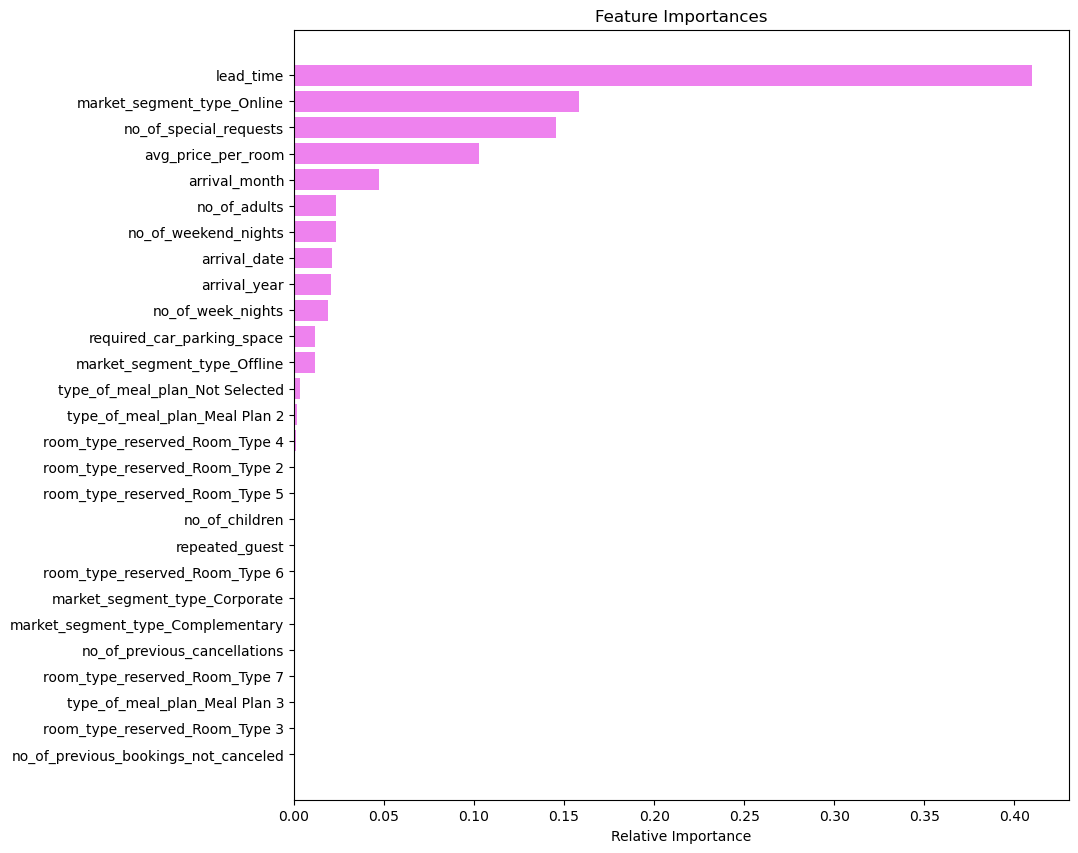

In [86]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:_Lead time is the most important factor for cancellation.  Room price, number of special requests, and whether the booking was made online are also an important factors for cancellation._________**

### **Random Forest Classifier**

In [89]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       0.99      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



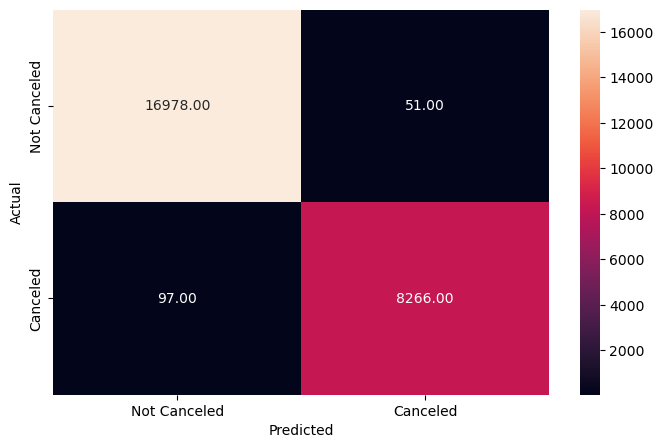

In [90]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

**Observations:__This is the best performing model on the training data so far.  Let's see if the classifier is overfitting.________**

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7361
           1       0.89      0.81      0.85      3522

    accuracy                           0.91     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.91      0.90     10883



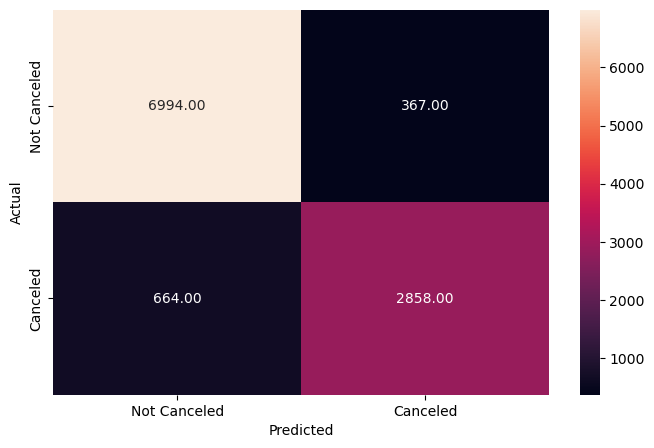

In [92]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test3)

**The model is overfitting on the training data. Let's see if we can get a better model by tuning the random forest classifier**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [96]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 6, 7],
    "max_features": [0.8, 0.9, 1]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [97]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=0.8,
                       random_state=7)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     17029
           1       0.84      0.73      0.78      8363

    accuracy                           0.87     25392
   macro avg       0.86      0.83      0.84     25392
weighted avg       0.86      0.87      0.86     25392



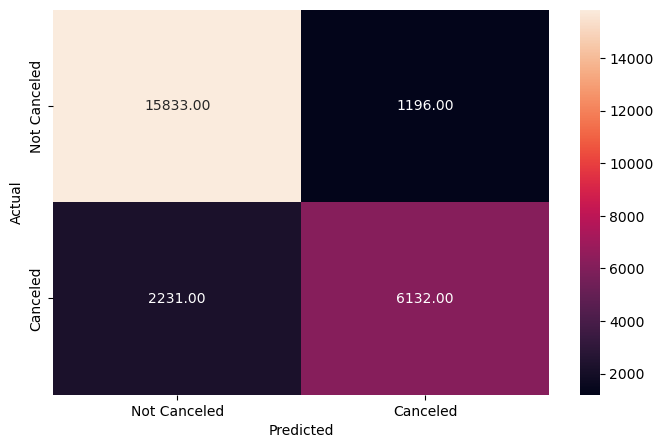

In [95]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

**Observations:__The changes made were not improvements to the model, peformance measures are worse.________**

**Note:** **GridSearchCV can take a long time to run** depending on the number of hyperparameters and the number of values tried for each hyperparameter. **Therefore, we have reduced the number of values passed to each hyperparameter.**

**Note:** The below code might take some time to run depending on your system's configuration.

In [98]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - f1 score for class 1
scorer = metrics.make_scorer(f1_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned =grid_obj.best_estimator_

#Fit the best estimator to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=7)

**Let's check the performance of the tuned model**

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     17029
           1       0.78      0.78      0.78      8363

    accuracy                           0.86     25392
   macro avg       0.84      0.84      0.84     25392
weighted avg       0.86      0.86      0.86     25392



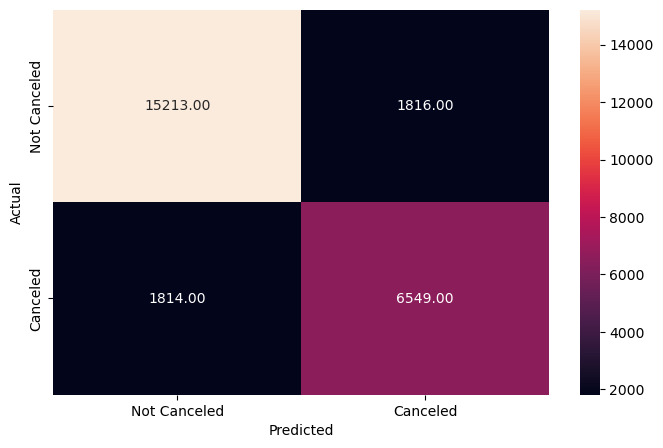

In [99]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

**Observations:_The performance on the training data is a bit lower, perhaps there is less overfitting.  Let's try the test data._______**

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7361
           1       0.78      0.78      0.78      3522

    accuracy                           0.86     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.86      0.86      0.86     10883



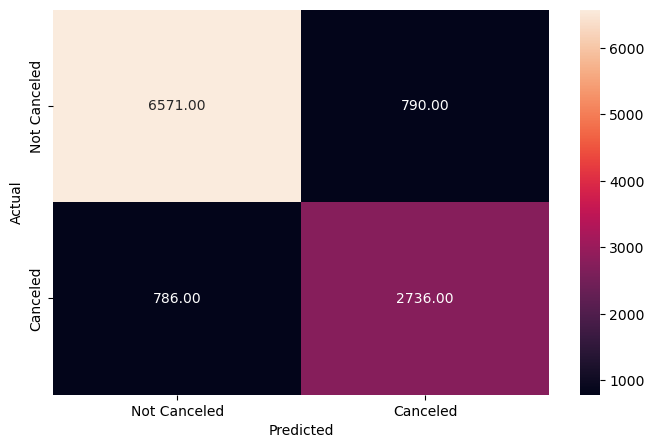

In [100]:
# Checking performance on the test data
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Observations:__The first random forest model before hyperparameter tuning was still better than this model._________**

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

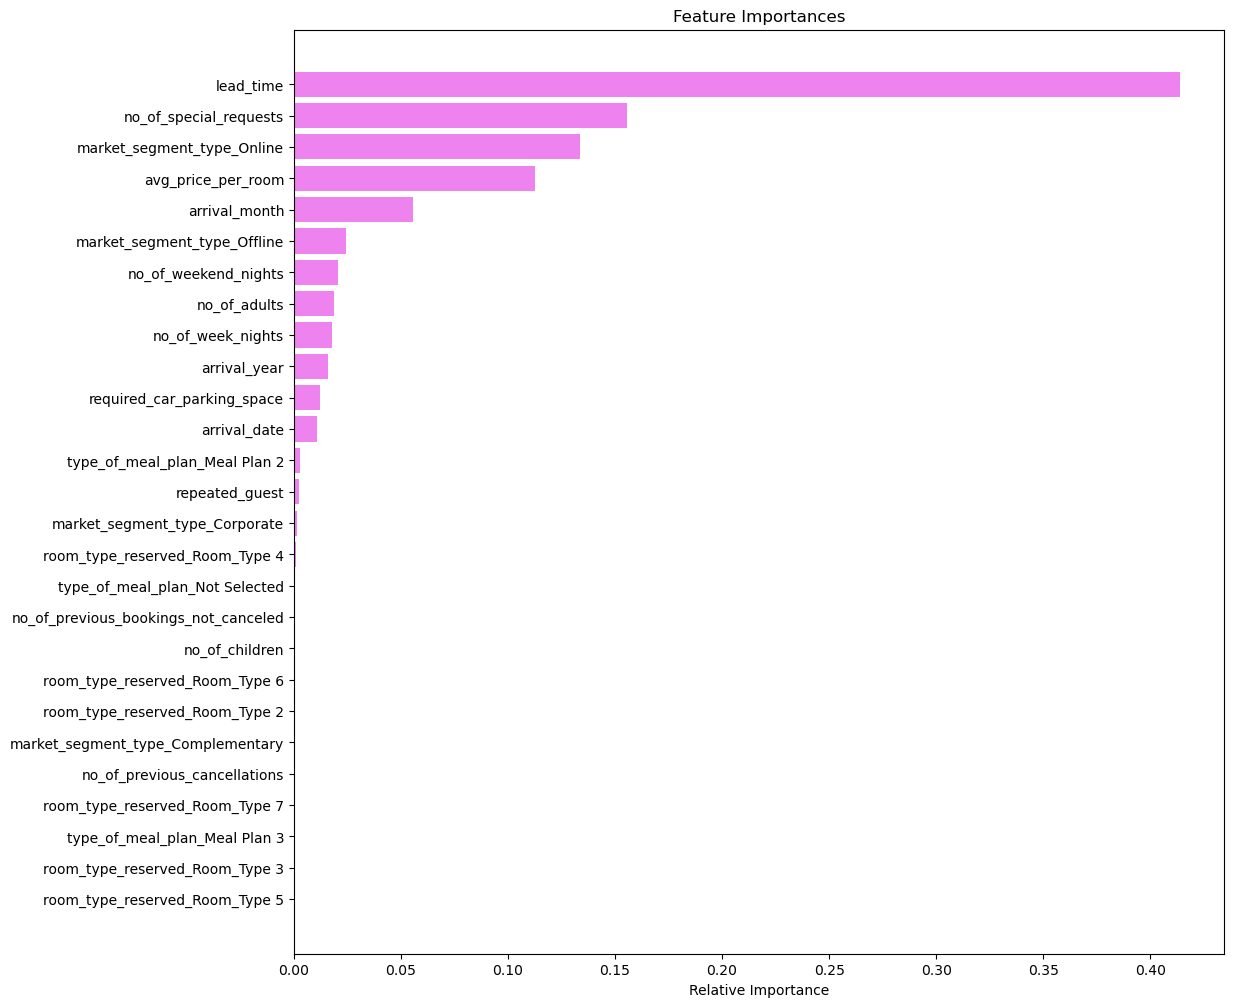

In [101]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:_The feature importance observed for random forests matches that of the decision tree.  The most important factor is lead time.  Other important factors are # of special requests, online bookings, price, and booking month._______**

### **Write the conclusion on the key factors that are driving the cancellations and write your recommendations to the business on how they can minimize the number of cancellations.**

### **Conclusion:**

The best classifier model was the decision tree with hyperparameter tuning.  It performed better for predicting cancellations than the random forest models.  The decision tree had the best recall 84% for cancellations.  Recall is an important performance measure because it is costly to miss cancellations. The most important factor for cancellation is lead time. Other important factors are number of special requests, online bookings, price, and booking month.

### **Recommendations:**

One way to reduce cancellations would be to send reminders to guests that booked with a long lead time. Another way is to make customers with more special request feel well served; in advance of their booking send them a letter showing them that their needs will be accomodated.  To reduce lost revenue from cancellation one practice to consider is overbooking by the number of predicted cancellations.  This would utilize all available resources.  